# Selecting Stars in GD1 by Applying Color and Proper Motion Cuts

This notebook consists of the final steps of the process to create the GD1 selection. It should run with no issues as long as the user has the appropriate initial fits file with extinction-corrected Gaia+PS1 data as well as an isochrone file.

We make a proper motion cut dependent on $\phi_1$. This is done by eye.

We then make a color cut using an isochrone (age=11.8, [Fe/H] = -2.0). We vary the distance modulus along the stream by using 14.5 for $\phi_1 < -10$ and 15.2 for $-10 < \phi_1 < 10$. This is consistent withe previous results that show relatively constant distance modulus except at one end of the stream.

In [10]:
import pathlib
import warnings
warnings.filterwarnings('ignore')
import os

# Third-party
import astropy.coordinates as coord
from astropy.io import fits
import astropy.units as u
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

import gala.coordinates as gc
from pyia import GaiaData

In [2]:
def plot_pretty(dpi=175, fontsize=15, labelsize=15, figsize=(10, 8), tex=True):
    # import pyplot and set some parameters to make plots prettier
    plt.rc('savefig', dpi=dpi)
    plt.rc('text', usetex=tex)
    plt.rc('font', size=fontsize)
    plt.rc('xtick.major', pad=1)
    plt.rc('xtick.minor', pad=1)
    plt.rc('ytick.major', pad=1)
    plt.rc('ytick.minor', pad=1)
    plt.rc('figure', figsize=figsize)
    mpl.rcParams['xtick.labelsize'] = labelsize
    mpl.rcParams['ytick.labelsize'] = labelsize
    mpl.rcParams.update({'figure.autolayout': False})
    
plot_pretty(fontsize=20, labelsize=20)

In [3]:
g_ps = GaiaData('data/gd1_gaia_ps1_all.fits')
g_ps

<GaiaData: 5097111 rows>

In [4]:
dist_ps = g_ps.get_distance(min_parallax=1e-3*u.mas)
c = g_ps.get_skycoord(distance=dist_ps)
stream_coord = c.transform_to(gc.GD1)
phi1_ps = stream_coord.phi1.degree
phi2_ps = stream_coord.phi2.degree
ps_pm1 = stream_coord.pm_phi1_cosphi2
ps_pm2 = stream_coord.pm_phi2

In [5]:
# for 0: the pm cut is not as clear for this one by eye, maybe 2D algorithm can improve it
ps_pm_ind0 = np.where((ps_pm1.value<-6.5) & (ps_pm1.value > -10) & (ps_pm2.value>-3.5) & (ps_pm2.value<-1)
                 & (phi1_ps<10) & (phi1_ps>0))
g_ps_pmcut0 = g_ps[ps_pm_ind0]

# for -10: the pm cut is not as clear for this one by eye, maybe 2D algorithm can improve it
ps_pm_ind_10 = np.where((ps_pm1.value<-7.5) & (ps_pm1.value > -11) & (ps_pm2.value>-3.5) & (ps_pm2.value<-1.5)
                 & (phi1_ps<0) & (phi1_ps>-10))
g_ps_pmcut_10 = g_ps[ps_pm_ind_10]

# for -20
ps_pm_ind_20 = np.where((ps_pm1.value<-9) & (ps_pm1.value > -12.5) & (ps_pm2.value>-3.5) & (ps_pm2.value<-1.5)
                 & (phi1_ps<-10) & (phi1_ps>-20))
g_ps_pmcut_20 = g_ps[ps_pm_ind_20]

# for -30
ps_pm_ind_30 = np.where((ps_pm1.value<-10.5) & (ps_pm1.value > -14) & (ps_pm2.value>-4.5) & (ps_pm2.value<-1.5)
                    & (phi1_ps<-20) & (phi1_ps>-30))
g_ps_pmcut_30 = g_ps[ps_pm_ind_30]

# for -40
ps_pm_ind_40 = np.where((ps_pm1.value<-11.5) & (ps_pm1.value > -14.5) & (ps_pm2.value>-4.5) & (ps_pm2.value<-2)
                    & (phi1_ps<-30) & (phi1_ps>-40))
g_ps_pmcut_40 = g_ps[ps_pm_ind_40]

# for -50
ps_pm_ind_50 = np.where((ps_pm1.value<-11.5) & (ps_pm1.value > -14.5) & (ps_pm2.value>-5) & (ps_pm2.value<-2.5)
                    & (phi1_ps<-40) & (phi1_ps>-50))
g_ps_pmcut_50 = g_ps[ps_pm_ind_50]

# for -60
ps_pm_ind_60 = np.where((ps_pm1.value<-11.5) & (ps_pm1.value > -14.5) & (ps_pm2.value>-5) & (ps_pm2.value<-2.5)
                    & (phi1_ps<-50) & (phi1_ps>-60))
g_ps_pmcut_60 = g_ps[ps_pm_ind_60]

# for -70
ps_pm_ind_70 = np.where((ps_pm1.value<-10.5) & (ps_pm1.value > -13.5) & (ps_pm2.value>-5) & (ps_pm2.value<-2.5)
                    & (phi1_ps<-60) & (phi1_ps>-70))
g_ps_pmcut_70 = g_ps[ps_pm_ind_70]

# for -80
ps_pm_ind_80 = np.where((ps_pm1.value<-9) & (ps_pm1.value > -11.5) & (ps_pm2.value>-5.5) & (ps_pm2.value<-2)
                    & (phi1_ps<-70) & (phi1_ps>-80))
g_ps_pmcut_80 = g_ps[ps_pm_ind_80]

# for -90
ps_pm_ind_90 = np.where((ps_pm1.value<-8.5) & (ps_pm1.value > -10.5) & (ps_pm2.value>-5.5) & (ps_pm2.value<-2)
                    & (phi1_ps<-80) & (phi1_ps>-90))
g_ps_pmcut_90 = g_ps[ps_pm_ind_90]

In [6]:
ps_pm_ind = np.concatenate([ps_pm_ind0[0], ps_pm_ind_10[0],ps_pm_ind_20[0], ps_pm_ind_30[0], ps_pm_ind_40[0], 
                         ps_pm_ind_50[0], ps_pm_ind_60[0], ps_pm_ind_70[0], ps_pm_ind_80[0], ps_pm_ind_90[0]])
g_ps_pmcut = g_ps[ps_pm_ind]

In [7]:
dist = g_ps_pmcut.get_distance(min_parallax=1e-3*u.mas)
c = g_ps_pmcut.get_skycoord(distance=dist)
stream_coord = c.transform_to(gc.GD1)
phi1_ps_pmcut = stream_coord.phi1.degree
phi2_ps_pmcut = stream_coord.phi2.degree

In [8]:
g0 = g_ps_pmcut['g_0']
i0 = g_ps_pmcut['i_0']

In [11]:
iso=pd.read_csv('data/isochrones/ps1_isochrone_age11.8_z-2.0.csv')[17:50]

#creating a polygon by isochrone
iso_contour = np.concatenate((np.vstack([iso.gP1mag-iso.iP1mag +0.1, iso.gP1mag]).T, 
                np.flip(np.vstack([iso.gP1mag-iso.iP1mag -0.05, iso.gP1mag]).T, axis = 0)))

#for -10 to 10, which seems to be slightly farther than everything else
poly = mpl.path.Path(iso_contour)
g_ccut_temp = g_ps_pmcut
cm = np.vstack([g0-i0,g0-15.2]).T
idx_iso_cut_10 = np.where(poly.contains_points(cm) & (phi1_ps_pmcut<10) & (phi1_ps_pmcut>-10))[0]

#for the rest of the stream which seems to be slightly farther than everything else
poly = mpl.path.Path(iso_contour)
g_ccut_temp = g_ps_pmcut
cm = np.vstack([g0-i0,g0-14.5]).T
idx_iso_cut_rest = np.where(poly.contains_points(cm) & (phi1_ps_pmcut<-10))[0]


ps_phi1_isocut = np.concatenate([idx_iso_cut_10, idx_iso_cut_rest])
g_ps_phi1_isocut = g_ps_pmcut[ps_phi1_isocut]

dist = g_ps_phi1_isocut.get_distance(min_parallax=1e-3*u.mas)
c = g_ps_phi1_isocut.get_skycoord(distance=dist)
stream_coord = c.transform_to(gc.GD1)
phi1_ps_isocut_better = stream_coord.phi1.degree
phi2_ps_isocut_better = stream_coord.phi2.degree

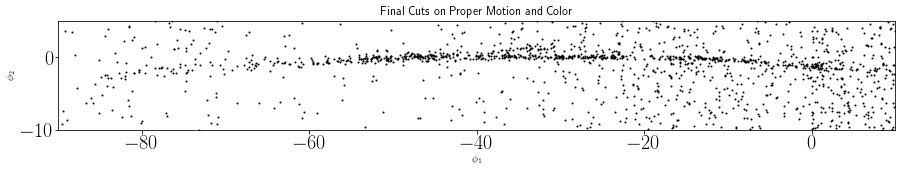

In [12]:
plt.figure(figsize=(15,2))
plt.scatter(phi1_ps_isocut_better, phi2_ps_isocut_better,s=1, c='k')
plt.xlim(-90,10) ; plt.ylim(-10,5)
plt.title('Final Cuts on Proper Motion and Color')
plt.xlabel(r'$\phi_1$') ; plt.ylabel(r'$\phi_2$')
plt.savefig('updated_pm_color_cuts.jpg')
plt.show()

In [13]:
final_t = g_ps_phi1_isocut.data
final_t.write('data/gd1_pass_cuts.fits', overwrite=True)